In [1]:
import utils
import numpy as np
import scipy.sparse
from tqdm import tqdm
import matplotlib.pyplot as plt
from recommenders.popularity import Popularity
%matplotlib inline

In [2]:
x = scipy.sparse.load_npz('./data/train.npz')
y = scipy.sparse.load_npz('./data/test.npz')
_y = y.tocsr()

In [3]:
K = 10

In [4]:
recommender = Popularity()

In [5]:
recommender.train(x)

In [6]:
recall_scores = []
for i in tqdm(range(y.shape[0])):
    topk = recommender.recommend(k=K, user=i)
    actual = _y[i]
    recall_scores.append(utils.recall_at_k(topk, actual))
print(f'AVG. RECALL@{K}: ', np.mean(recall_scores))

100%|████████████████████████████████████████████████████████████████████████| 68401/68401 [00:18<00:00, 3771.70it/s]

AVG. RECALL@10:  2.5778558932182987e-05


In [8]:
ndcg_scores = []
for i in tqdm(range(y.shape[0])):
    topk = recommender.recommend(k=K, user=i)
    actual = _y[i]
    ndcg_scores.append(utils.ndcg_at_k(topk, actual))
print(f'AVG. NDCG@{K}: ', np.mean(ndcg_scores))

100%|███████████████████████████████████████████████████████████████████████| 68401/68401 [00:05<00:00, 12930.73it/s]

AVG. NDCG@10:  0.0001979226276452699


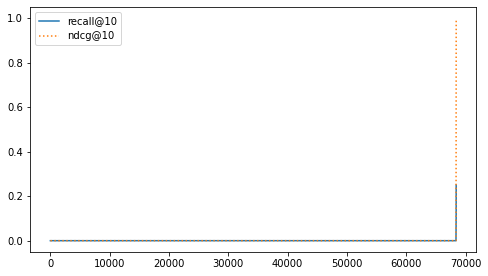

In [13]:
plt.figure(figsize=(8, 4.5))
plt.plot(sorted(recall_scores), label=f"recall@{K}")
plt.plot(sorted(ndcg_scores), label=f"ndcg@{K}", linestyle='dotted')
plt.legend()
plt.show()